In [1]:
import nltk

import gensim

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """In folklore, a werewolf[a] (Old English: werwulf, "man-wolf"), or occasionally lycanthrope /ˈlaɪkənˌθroʊp/ (Greek: λυκάνθρωπος lukánthrōpos, "wolf-person"), is a human with the ability to shapeshift into a wolf (or, especially in modern film, a therianthropic hybrid wolflike creature), either purposely or after being placed under a curse or affliction (often a bite or scratch from another werewolf) with the transformations occurring on the night of a full moon. Early sources for belief in this ability or affliction, called lycanthropy /laɪˈkænθrəpi/, are Petronius (27–66) and Gervase of Tilbury (1150–1228).

The werewolf is a widespread concept in European folklore, existing in many variants, which are related by a common development of a Christian interpretation of underlying European folklore developed during the medieval period. From the early modern period, werewolf beliefs also spread to the New World with colonialism. Belief in werewolves developed in parallel to the belief in witches, in the course of the Late Middle Ages and the Early Modern period. Like the witchcraft trials as a whole, the trial of supposed werewolves emerged in what is now Switzerland (especially the Valais and Vaud) in the early 15th century and spread throughout Europe in the 16th, peaking in the 17th and subsiding by the 18th century.

The persecution of werewolves and the associated folklore is an integral part of the "witch-hunt" phenomenon, albeit a marginal one, accusations of lycanthropy being involved in only a small fraction of witchcraft trials.[b] During the early period, accusations of lycanthropy (transformation into a wolf) were mixed with accusations of wolf-riding or wolf-charming. The case of Peter Stumpp (1589) led to a significant peak in both interest in and persecution of supposed werewolves, primarily in French-speaking and German-speaking Europe. The phenomenon persisted longest in Bavaria and Austria, with persecution of wolf-charmers recorded until well after 1650, the final cases taking place in the early 18th century in Carinthia and Styria.[c]

After the end of the witch-trials, the werewolf became of interest in folklore studies and in the emerging Gothic horror genre; werewolf fiction as a genre has pre-modern precedents in medieval romances (e.g. Bisclavret and Guillaume de Palerme) and developed in the 18th century out of the "semi-fictional" chap book tradition. The trappings of horror literature in the 20th century became part of the horror and fantasy genre of modern popular culture."""

In [2]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['in folklore, a werewolf[a] (old english: werwulf, "man-wolf"), or occasionally lycanthrope /ˈlaɪkənˌθroʊp/ (greek: λυκάνθρωπος lukánthrōpos, "wolf-person"), is a human with the ability to shapeshift into a wolf (or, especially in modern film, a therianthropic hybrid wolflike creature), either purposely or after being placed under a curse or affliction (often a bite or scratch from another werewolf) with the transformations occurring on the night of a full moon.',
 'early sources for belief in this ability or affliction, called lycanthropy /laɪˈkænθrəpi/, are petronius ( – ) and gervase of tilbury ( – ).',
 'the werewolf is a widespread concept in european folklore, existing in many variants, which are related by a common development of a christian interpretation of underlying european folklore developed during the medieval period.',
 'from the early modern period, werewolf beliefs also spread to the new world with colonialism.',
 'belief in werewolves developed in parallel to the bel

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['in',
  'folklore',
  ',',
  'a',
  'werewolf',
  '[',
  'a',
  ']',
  '(',
  'old',
  'english',
  ':',
  'werwulf',
  ',',
  '``',
  'man-wolf',
  "''",
  ')',
  ',',
  'or',
  'occasionally',
  'lycanthrope',
  '/ˈlaɪkənˌθroʊp/',
  '(',
  'greek',
  ':',
  'λυκάνθρωπος',
  'lukánthrōpos',
  ',',
  '``',
  'wolf-person',
  "''",
  ')',
  ',',
  'is',
  'a',
  'human',
  'with',
  'the',
  'ability',
  'to',
  'shapeshift',
  'into',
  'a',
  'wolf',
  '(',
  'or',
  ',',
  'especially',
  'in',
  'modern',
  'film',
  ',',
  'a',
  'therianthropic',
  'hybrid',
  'wolflike',
  'creature',
  ')',
  ',',
  'either',
  'purposely',
  'or',
  'after',
  'being',
  'placed',
  'under',
  'a',
  'curse',
  'or',
  'affliction',
  '(',
  'often',
  'a',
  'bite',
  'or',
  'scratch',
  'from',
  'another',
  'werewolf',
  ')',
  'with',
  'the',
  'transformations',
  'occurring',
  'on',
  'the',
  'night',
  'of',
  'a',
  'full',
  'moon',
  '.'],
 ['early',
  'sources',
  'for',
  'be

In [6]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [7]:
sent_word

[['folklore',
  ',',
  'werewolf',
  '[',
  ']',
  '(',
  'old',
  'english',
  ':',
  'werwulf',
  ',',
  '``',
  'man-wolf',
  "''",
  ')',
  ',',
  'occasionally',
  'lycanthrope',
  '/ˈlaɪkənˌθroʊp/',
  '(',
  'greek',
  ':',
  'λυκάνθρωπος',
  'lukánthrōpos',
  ',',
  '``',
  'wolf-person',
  "''",
  ')',
  ',',
  'human',
  'ability',
  'shapeshift',
  'wolf',
  '(',
  ',',
  'especially',
  'modern',
  'film',
  ',',
  'therianthropic',
  'hybrid',
  'wolflike',
  'creature',
  ')',
  ',',
  'either',
  'purposely',
  'placed',
  'curse',
  'affliction',
  '(',
  'often',
  'bite',
  'scratch',
  'another',
  'werewolf',
  ')',
  'transformations',
  'occurring',
  'night',
  'full',
  'moon',
  '.'],
 ['early',
  'sources',
  'belief',
  'ability',
  'affliction',
  ',',
  'called',
  'lycanthropy',
  '/laɪˈkænθrəpi/',
  ',',
  'petronius',
  '(',
  '–',
  ')',
  'gervase',
  'tilbury',
  '(',
  '–',
  ')',
  '.'],
 ['werewolf',
  'widespread',
  'concept',
  'european',
  'fol

In [8]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [11]:
# Test the word vectors
vector = model.wv['werewolf']

print(vector)

[-3.0127787e-03  4.1971728e-03  1.1152619e-03  2.3176936e-03
 -2.4557635e-03  6.0702057e-04 -3.9444556e-03  2.0963864e-03
 -4.9750302e-03 -3.9750095e-03 -1.4813830e-03 -1.3049503e-03
  3.6741060e-03 -2.2229352e-03  3.0375770e-03 -4.4660512e-03
 -4.2970558e-03  3.6887217e-03  9.5553126e-04  4.0559494e-03
 -2.2189712e-04 -3.8627111e-03  4.0029981e-03  1.5664336e-03
 -4.0079006e-03  2.3321384e-03 -1.4791403e-03  2.2092999e-03
 -1.2333011e-03  1.9861544e-03  2.4534322e-03  1.6648758e-03
 -4.1438709e-03 -4.3784874e-03 -4.8160553e-03 -3.7119794e-03
 -4.2619654e-03 -1.1620038e-03  1.7342077e-03 -1.3615534e-03
 -4.5682886e-03 -3.0480318e-03 -3.3680426e-05  1.1953592e-03
  4.4279252e-03 -2.9816823e-03 -9.9356263e-04  1.6035303e-04
 -3.2904304e-03 -2.8293119e-03 -4.5887423e-03  3.7817366e-03
  3.7808241e-03 -1.7228093e-03 -3.1288376e-04 -1.7739058e-04
  1.7461755e-03 -3.0195322e-03  1.9011799e-03  4.8254514e-03
 -3.7037937e-03 -4.8327303e-04  2.3169545e-03  4.3594399e-03
  4.8746541e-03  3.30992

In [12]:
# Most similar words
similar = model.wv.most_similar('werewolf',topn=20)

similar

[('tradition', 0.26125213503837585),
 ('accusations', 0.2447705864906311),
 ('occurring', 0.2289944440126419),
 ('peaking', 0.21301673352718353),
 ('affliction', 0.20042841136455536),
 ('recorded', 0.19484421610832214),
 ('christian', 0.1864309310913086),
 ('development', 0.16893771290779114),
 ('called', 0.16709329187870026),
 ('placed', 0.16540227830410004),
 ('place', 0.15761280059814453),
 ('common', 0.15755051374435425),
 ('peak', 0.14529044926166534),
 ('european', 0.1421106904745102),
 ('french-speaking', 0.14114782214164734),
 ('persisted', 0.13774478435516357),
 ('pre-modern', 0.13698819279670715),
 ('marginal', 0.1301889568567276),
 ('beliefs', 0.12035292387008667),
 ('palerme', 0.1103985458612442)]

In [17]:
# You can also check words similarity and compare above
model.wv.similarity(w1='werewolf',w2='man-wolf')

0.09075447

In [20]:
# Same words similarity
model.wv.similarity(w1='tradition',w2='culture')

0.016854089

In [19]:
# filter on non similarity
model.wv.doesnt_match(["witch-hun","witchcraft","witches"])

C:\mlds\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'witchcraft'

C:\mlds\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


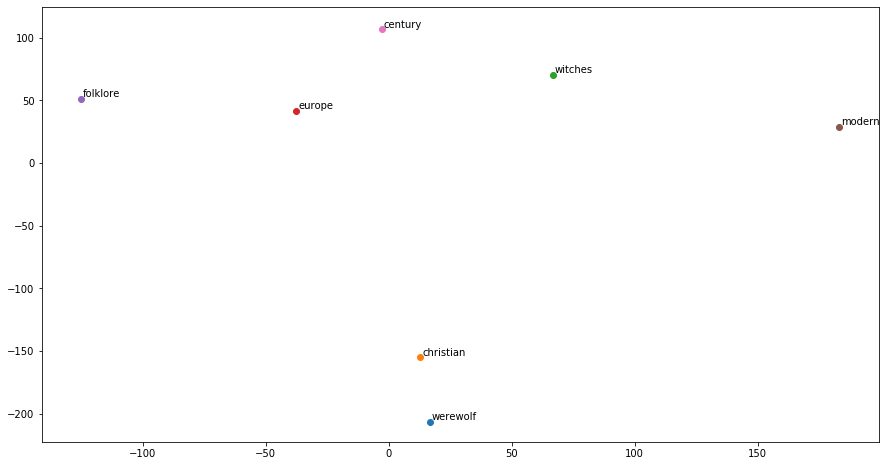

In [23]:
from sklearn.manifold import  TSNE
vocab = ['werewolf','christian','witches','europe','folklore','modern','century']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)